# Indeksering og slicing i 2d array - Eksempel: Sudoku
Et sudokubrett (typisk 9 x 9 fylt med heltall 1..9)
- er et eksempel på noe som kan representeres greit med et numpy array
- og hvor både rader, kolonner og andre utdrag (spesielt 3 x 3) spiller en viktig rolle

I mange funksjoner relatert til sudoku vil derfor slicing i 2d array være nyttig
- f.eks. lage et sudoku-brett med innfylte tall
- sjekke om et brett er lovlig innfylt

Her ser vi i første omgang på sjekke om brett er lovlig

## Regler for sudoku
Det kan finnes brett i ulike størrelser, f.eks. 4x4, 9x9, 16x16
- men vi fokuserer på vanlige 9x9-regler

Hver rad, hver kolonne, og hver 3x3 boks (med startindekser i%3 == 0, j%3 == 0)
- må inneholde 9 unike tall 1..9
- dvs. hvert av tallene 1..9 må forekomme nøyaktig en gang i hver rad, kolonne og 3x3-boks

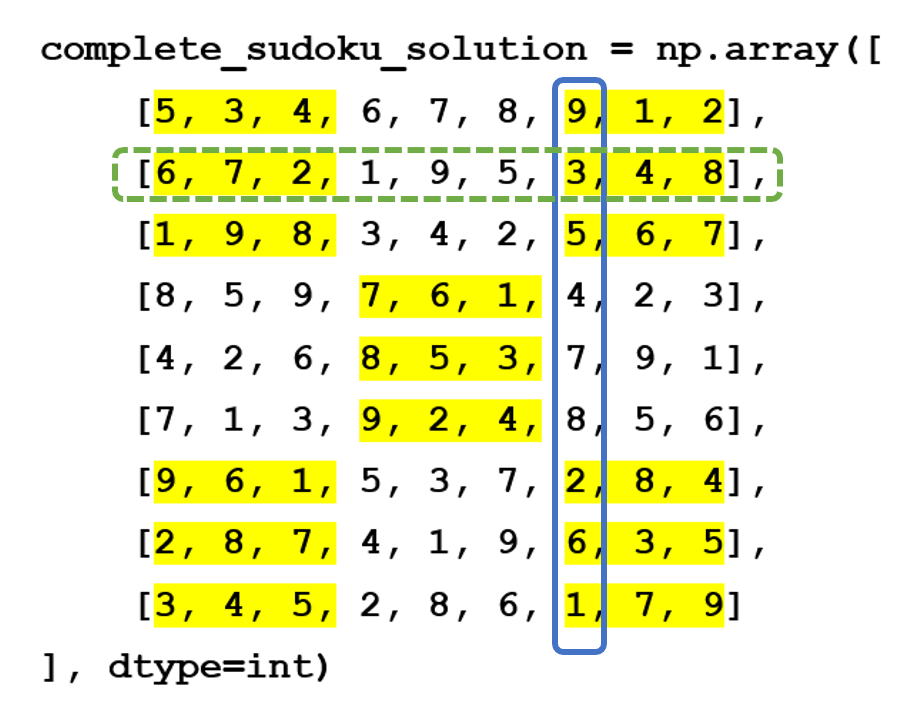

## Løsninger
Vi viser to versjoner
- en hvor vi bruker set() for å sjekke alle unike
- en hvor vi bruker np.unique
    - dette er nok mest effektivt når vi jobber på array
    
Ellers ganske like
- ikke veldig vanskelig logikk
- men må klare å slice riktig fra brettet


In [4]:
import numpy as np

def is_valid_set(board):
    '''
    Receives a complete sudoku solution as a numpy array
    This solution can work for other sizes than 9x9, too
    which is why it first has to look at the size of the board
    Returns True if the board is valid, otherwise False
    '''
    # determine size of board and calculate size of smaller blocks
    # e.g., 3 if the board size is 9x9
    rows, cols = board.shape
    d = round(np.sqrt(rows))
    if rows != cols or d*d != rows:
        return False # non-square shape of board, or dimension not a square number
    
    # At least, dimensions are valid, move on to check content
    # checking rows
    for row in board:
        if set(row) != set(range(1,d**2+1)): # would be range(1,10) w standard size
            return False
    # checking columns
    for col in range(board.shape[1]):
        col_vector = board[:,col]
        if set(col_vector) != set(range(1,d**2+1)):
            return False
    # checking dxd (e.g. 3x3) boxes
    for i in range(0, d*d, d):
        for j in range(0, d*d, d):
            block_dxd = board[i:i+d, j:j+d]
            # Here we must use flatten(), as set() does not directly convert a 2d array
            if set(block_dxd.flatten()) != set(range(1,d**2+1)):
                return False
    
    # Nothing wrong found in any loop, the board is OK
    return True

In [8]:
import numpy as np
import random as r


def is_valid_unique(board):
    '''
    Receives a complete sudoku solution 
    Returns True if the board is valid, otherwise False
    '''
     # determine size of board and calculate size of smaller blocks
    # e.g., 3 if the board size is 9x9
    rows, cols = board.shape
    d = round(np.sqrt(rows))
    if rows != cols or d*d != rows:
        return False # non-square shape of board, or dimension not a square number
    
    # checking rows
    for row in board:
        if np.unique(row).size != row.size:
            return False
    # checking columns
    for col in range(board.shape[1]):
        col_vector = board[:,col]
        if np.unique(col_vector).size != col_vector.size:
            return False
    # checking dxd (e.g. 3x3) boxes
    for i in range(0, d*d, d):
        for j in range(0, d*d, d): 
            block_dxd = board[i:i+d, j:j+d]
            if np.unique(block_dxd).size  != block_dxd.size:
                return False
    return True

## Kode for utprøving

In [6]:
## Kode for utprøving
ok_sudoku = np.array([
    [5, 3, 4, 6, 7, 8, 9, 1, 2],
    [6, 7, 2, 1, 9, 5, 3, 4, 8],
    [1, 9, 8, 3, 4, 2, 5, 6, 7],
    [8, 5, 9, 7, 6, 1, 4, 2, 3],
    [4, 2, 6, 8, 5, 3, 7, 9, 1],
    [7, 1, 3, 9, 2, 4, 8, 5, 6],
    [9, 6, 1, 5, 3, 7, 2, 8, 4],
    [2, 8, 7, 4, 1, 9, 6, 3, 5],
    [3, 4, 5, 2, 8, 6, 1, 7, 9]
], dtype=int)

feil_sudoku = np.array([
    [5, 3, 4, 6, 7, 8, 9, 1, 2],
    [6, 7, 2, 1, 9, 5, 3, 4, 8],
    [1, 9, 8, 3, 4, 2, 5, 6, 7],
    [8, 5, 9, 7, 6, 1, 4, 2, 3],
    [4, 2, 6, 8, 5, 3, 7, 9, 1],
    [7, 1, 3, 9, 2, 4, 8, 5, 6],
    [9, 6, 5, 1, 3, 7, 2, 8, 4],
    [2, 8, 7, 4, 1, 9, 6, 3, 5],
    [3, 4, 5, 2, 8, 6, 1, 7, 9]
], dtype=int)

print(is_valid_set(ok_sudoku))
print(is_valid_set(feil_sudoku))
print(is_valid_unique(ok_sudoku))
print(is_valid_unique(feil_sudoku))

True
False
True
False


## Eksperiment
Kan vi også bruke is_valid-funksjonen vår til å lage et array?
- med en primitiv framgangsmåte: bare stokke en og en rad tilfeldig
    - inntil rada er gyldig vs. tidligere plasserte rader?
    - Børge: merk her at vi aldri går tilbake og endrer tidligere lagte rader. For enhver løsning vi har funnet så langt som oppfyller kravene, så vil det finnes en videre løsning for senere rader. Det kan derimot ta lang tid å finne den!

In [10]:
def make_solution(validity_check_function):
    '''
    Returns a valid sudoku board solution as a 9x9 numpy array, and also returns
    a numpy array containing the number of shuffles needed for each row.
    The approach of the function is primitive, just random shuffling each new
    row repeatedly until a valid row appears. This tends to require a lot of shuffles,
    especially in the latter stage where most valid combinations are exhausted.
    Hence, NOT A RECOMMENDED APPROACH if you really want to made a lot of sudoku boards
    as it wastes time and electricity
    '''
    arr = np.arange(1,82).reshape(9,9)
    counts = np.array([1]*9)
    liste = list(range(1,10)) # Tallene 1..9
    r.shuffle(liste)          # stokker om tilfeldig
    arr[0] = np.array(liste)  # Lager første rad, denne går alltid bra siden det ikke er noe å være i konflikt med
    print("Row 0 done!")
    for i in range(1,9):      # Løkke for å lage de neste 8 radene
        r.shuffle(liste)           # stokker igjen tilfeldig
        arr[i] = np.array(liste)   # gjør om til et array
        count = 1                  # teller for å finne hvor mange omstokkinger vi bruker på denne runden
        while not is_valid_unique(arr):   # Hvis arr[i] er i konflikt med tidligere fylt del av brettet, stokke om på nytt
            r.shuffle(liste)                # dvs. går i løkke, stokker og stokker til ei gyldig rad dukker opp
            arr[i] = np.array(liste)
            count += 1
        counts[i] = count          # Legger antall stokkinger vi brukte på denne rada inn i ei  liste
        print(f"Row {i} done!")
    
    return arr, counts

arr, counts = make_solution(is_valid_unique)
print(arr)
print(counts)

Row 0 done!
Row 1 done!
Row 2 done!
Row 3 done!
Row 4 done!
Row 5 done!
Row 6 done!
Row 7 done!
Row 8 done!
[[6 8 9 4 7 2 3 1 5]
 [3 1 2 5 9 8 7 4 6]
 [7 5 4 6 1 3 2 9 8]
 [5 6 7 8 2 1 4 3 9]
 [9 2 1 3 4 6 8 5 7]
 [4 3 8 9 5 7 6 2 1]
 [2 7 3 1 8 9 5 6 4]
 [1 4 6 7 3 5 9 8 2]
 [8 9 5 2 6 4 1 7 3]]
[     1     50      6      7    476  32081  22955 286077 513404]


## Oppsummering
is_valid-funksjonene for sudokubrett viser slagkraften i slicing i 2d-array
- gjør sjekk av gyldig brett enkel og kompakt

For å lage brett bør man imidlertid ha en mer avansert framgangsmåte
- prøving og feiling med tilfeldig stokking tar lang tid på de siste radene

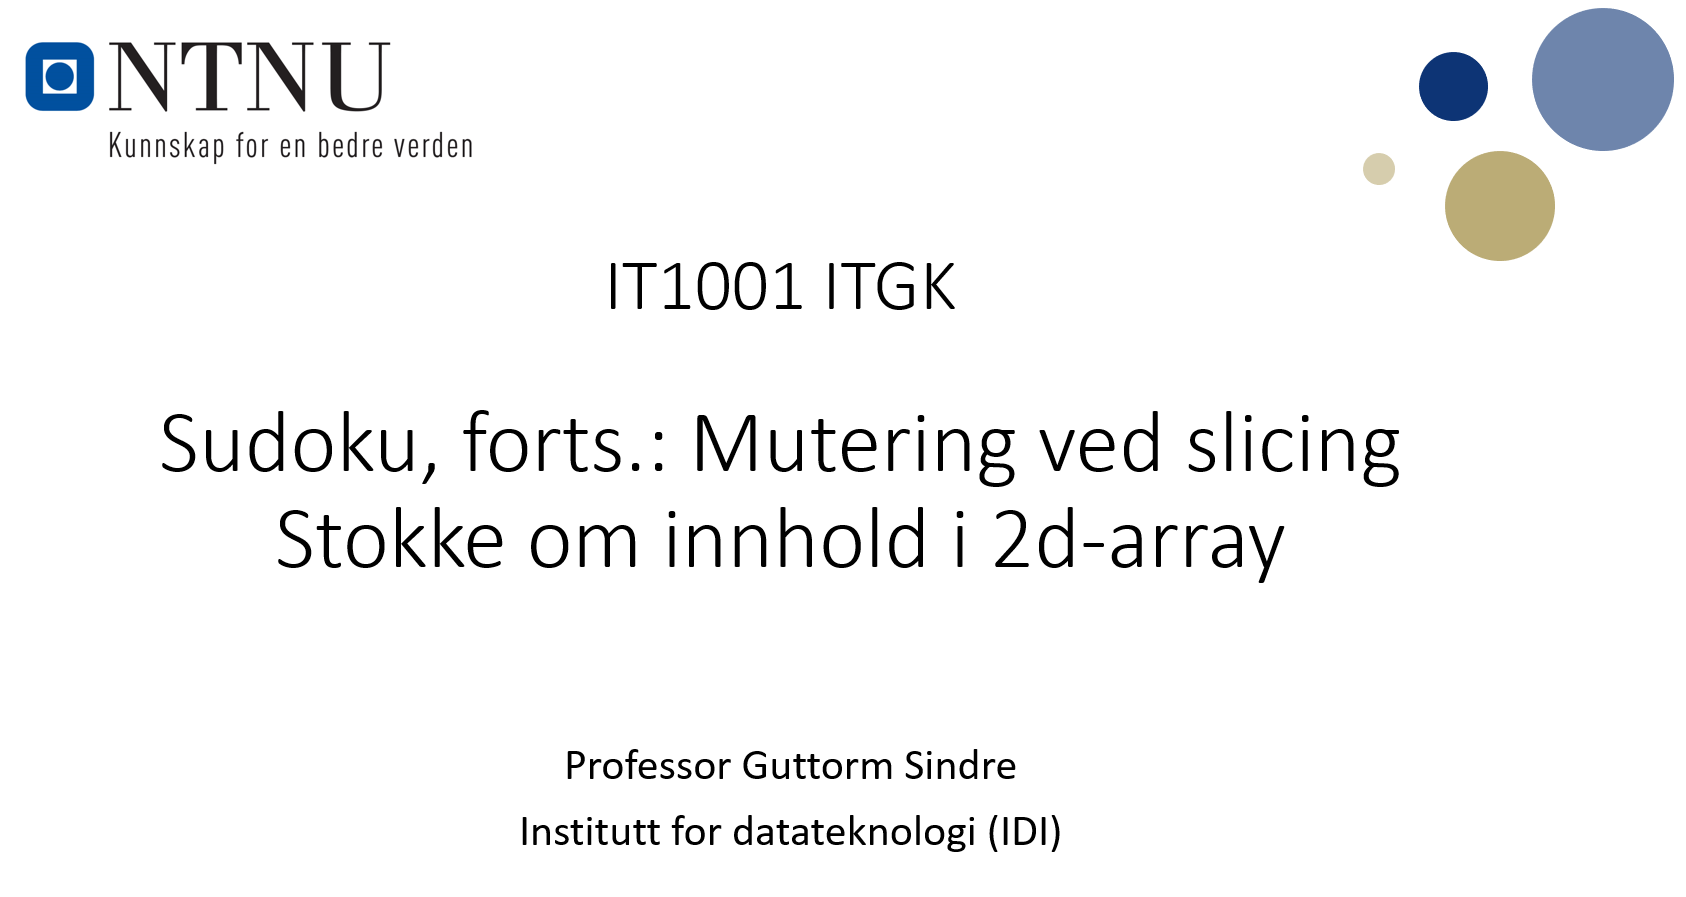

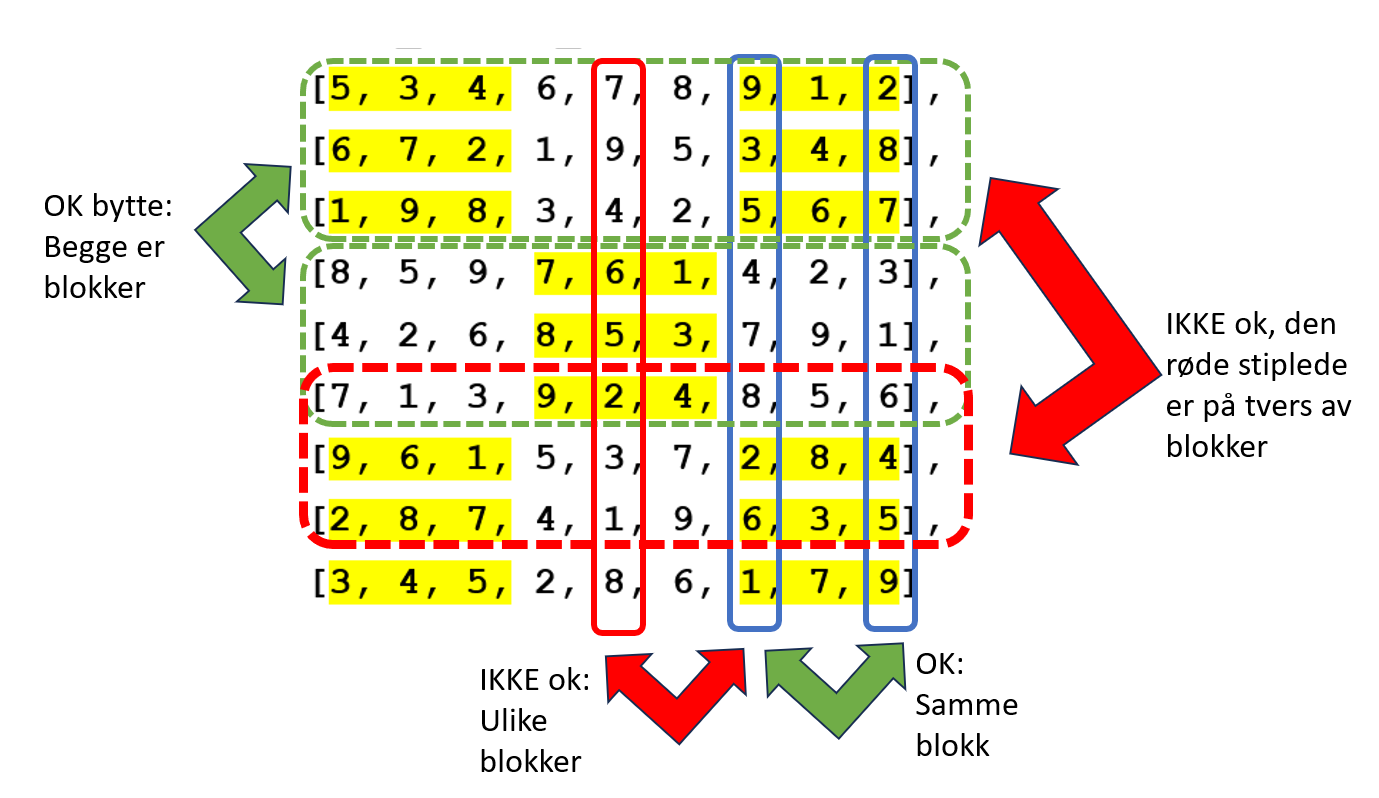

## Bytte enkelt-rader og enkelt-kolonner
Viktig å huske
- kopiering før bytting
- slice av hele rad for å bytte kolonner

In [ ]:
def swap_rows(board, row1, row2):
    """
    Mottar et sudokubrett board og to radindekser row1 og row2.
    Muterer board ved å bytte innhold på de to radene.
    Hvis indekser er utenfor eller begge indekser er like, printes en advarsel, og ingen endring blir gjort.
    """
    dim = board.shape[0]
    block = round(np.sqrt(dim))
    if row1 in range(dim) and row2 in range(dim) and row1 != row2 and row1 // block == row2 // block:
        temp = board[row1].copy()
        board[row1] = board[row2]
        board[row2] = temp
    else:
        print(f"WARNING: Rejected swap of rows: {row1}, {row2} for {dim}x{dim} board.")
        
def swap_columns(board, col1, col2):
    """
    Mottar et sudokubrett board og to radindekser row1 og row2.
    Muterer board ved å bytte innhold på de to radene.
    Hvis indekser er utenfor eller begge indekser er like, printes en advarsel. 
    """
    dim = board.shape[0]
    block = round(np.sqrt(dim))
    if col1 in range(dim) and col2 in range(dim) and col1 != col2 and col1 // block == col2 // block:
        temp = board[:,col1].copy()
        board[:,col1] = board[:,col2]
        board[:,col2] = temp
    else:
        print(f"WARNING: Rejected swap of columns: {col1}, {col2} for {dim}x{dim} board.")

## Bytting av rad-blokker
Viser to alternative implementasjoner
- en hvor parametrene bk1, bk2 er startindeks for første rad i blokk
    - dvs. 0, 3, 6 i et standard 9x9 brett; 0, 4, 8, 12 i 16x16
- en annen hvor parametrene bk1, bk2 er løpenummer for blokkene
    - dvs. 0, 1, 2 i et standard 9x9 brett; 0, 1, 2, 3 i 16x16
    
Som for enkeltrader / kolonner: Viktig å huske copy!

In [ ]:
import numpy as np

def swap_row_blocks_v1(board, bk1, bk2):
    """
    Bytter om to rad-blokker i et sudokubrett gitt som et 2d numpy array.
    Blokker er angitt med startindeks for sin øverste rad, f.eks. i et standard 9x9 brett
    vil da bk1 = 0, bk2 = 3 indikere at man skal bytte om øverste og midterste blokk.
    """
    rows = board.shape[0]
    dim = round(np.sqrt(rows))
    if bk1 == bk2 or bk1 not in range(rows) or bk2 not in range(rows) or bk1 % dim != 0 or bk2 % dim != 0:
        print(f"WARNING: Rejected row block swap: {bk1}, {bk2} for {dim}x{dim} board.")
    else:
        temp = board[bk1:bk1+dim].copy()
        board[bk1 : bk1+dim] = board[bk2 : bk2+dim]
        board[bk2 : bk2+dim] = temp

def swap_row_blocks_v2(board, bk1, bk2):
    """
    Bytter om to rad-blokker i et sudokubrett gitt som et 2d numpy array.
    Blokker er angitt med løpenummer 0, 1, 2, ... F.eks. i et standard 9x9 brett
    vil da bk1 = 0, bk2 = 1 indikere at man skal bytte om øverste og midterste blokk.
    """
    rows = board.shape[0]
    dim = round(np.sqrt(rows))
    if bk1 == bk2 or bk1 not in range(dim) or bk2 not in range(dim):
        print(f"WARNING: Rejected row block swap: {bk1}, {bk2} for {dim}x{dim} board.")
    else:
        temp = board[bk1*dim:(bk1+1)*dim].copy()
        board[bk1*dim : (bk1+1)*dim] = board[bk2*dim : (bk2+1)*dim]
        board[bk2*dim : (bk2+1)*dim] = temp

## Bytting av kolonne-blokker
Viser to alternative implementasjoner
- en hvor parametrene bk1, bk2 er startindeks for første rad i blokk
    - dvs. 0, 3, 6 i et standard 9x9 brett; 0, 4, 8, 12 i 16x16
- en annen hvor parametrene bk1, bk2 er løpenummer for blokkene
    - dvs. 0, 1, 2 i et standard 9x9 brett; 0, 1, 2, 3 i 16x16
    
Som for enkeltrader / kolonner: Viktig å huske copy!
- samt slicing av hel rad her for å bytte kolonner

In [ ]:
def swap_col_blocks_v1(board, bk1, bk2):
    """
    Bytter om to kolonne-blokker i et sudokubrett gitt som et 2d numpy array.
    Blokker er angitt med indeks for til venstre, f.eks. i et standard 9x9 brett
    vil da bk1 = 0, bk2 = 3 indikere at man skal bytte om venstre og midterste blokk.
    """
    cols = board.shape[1]
    dim = round(np.sqrt(cols))
    if bk1 == bk2 or bk1 not in range(cols) or bk2 not in range(cols) or bk1 % dim != 0 or bk2 % dim != 0:
        print(f"WARNING: Rejected column block swap: {bk1}, {bk2} for {dim}x{dim} board.")
    else:
        temp = board[:,bk1:bk1+dim].copy()
        board[ :, bk1 : bk1+dim] = board[ :, bk2 : bk2+dim]
        board[ :, bk2 : bk2+dim] = temp
        
def swap_col_blocks_v2(board, bk1, bk2):
    """
    Bytter om to kolonne-blokker i et sudokubrett gitt som et 2d numpy array.
    Blokker er angitt med løpenummer 0, 1, 2, ... fra venstre, f.eks. i et standard 9x9 brett
    vil da bk1 = 0, bk2 = 1 indikere at man skal bytte om venstre og midterste blokk.
    """
    dim = round(np.sqrt(board.shape[0]))
    if bk1 == bk2 or bk1 not in range(dim) or bk2 not in range(dim):
        print(f"WARNING: Rejected column block swap: {bk1}, {bk2} for {dim}x{dim} board.")
    else:
        temp = board[:,bk1*dim:(bk1+1)*dim].copy()
        board[ :, bk1*dim : (bk1+1)*dim] = board[ :, bk2*dim : (bk2+1)*dim]
        board[ :, bk2*dim : (bk2+1)*dim] = temp

## Kode for utprøving

In [ ]:
board1 = np.array([
    [5, 3, 4, 6, 7, 8, 9, 1, 2],
    [6, 7, 2, 1, 9, 5, 3, 4, 8],
    [1, 9, 8, 3, 4, 2, 5, 6, 7],
    [8, 5, 9, 7, 6, 1, 4, 2, 3],
    [4, 2, 6, 8, 5, 3, 7, 9, 1],
    [7, 1, 3, 9, 2, 4, 8, 5, 6],
    [9, 6, 1, 5, 3, 7, 2, 8, 4],
    [2, 8, 7, 4, 1, 9, 6, 3, 5],
    [3, 4, 5, 2, 8, 6, 1, 7, 9]
], dtype=int)

print(board1)
swap_rows(board1, 1, 5) # skal bli nekta, ikke samme blokk
swap_rows(board1, 0, 1) # skal gå bra
print(board1)
swap_columns(board1, 3, 8) # skal bli nekta, ikke samme blokk
swap_columns(board1, 7, 8) # skal gå bra
print(board1)
swap_row_blocks_v1(board1, 0, 9) # skal bli nekta, utenfor indeks
swap_row_blocks_v1(board1, 0, 3) # skal gå bra
print(board1)
swap_row_blocks_v2(board1, 0, 3) # skal bli nekta her, nummerering var 0,1,2
swap_row_blocks_v2(board1, 1, 2) # skal gå bra
print(board1)
swap_col_blocks_v1(board1, 0, 10) # skal bli nekta, utenfor indeks
swap_col_blocks_v1(board1, 0, 3) # skal gå bra
print(board1)
swap_col_blocks_v2(board1, 0, 6) # skal bli nekta, nummerering i v2 var 0,1,2
swap_col_blocks_v2(board1, 0, 1) # skal gå bra
print(board1)


## Oppsummering
Slicing gjør det lett å bytte om innhold på deler av 2d-array
- husk copy() før man bytter

Største utfordring: mye indekser å holde styr på?